In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/yolotestdata/182.jpg
/kaggle/input/yolotestdata/185.jpg
/kaggle/input/yolotestdata/176.jpg
/kaggle/input/yolotestdata/163.jpg
/kaggle/input/yolotestdata/160.jpg
/kaggle/input/yolotestdata/178.jpg
/kaggle/input/yolotestdata/177.jpg
/kaggle/input/yolotestdata/179.jpg
/kaggle/input/yolotestdata/166.jpg
/kaggle/input/yolotestdata/180.jpg
/kaggle/input/yolotestdata/164.jpg
/kaggle/input/yolotestdata/161.jpg
/kaggle/input/yolotestdata/183.jpg
/kaggle/input/yolotestdata/165.jpg
/kaggle/input/yolotestdata/181.jpg
/kaggle/input/yolotestdata/184.jpg
/kaggle/input/yolotestdata/162.jpg
/kaggle/input/yolotestdata/18.jpg
/kaggle/input/yolotestdata/175.jpg
/kaggle/input/content/Human-Segmentation-Dataset-master/README.md
/kaggle/input/content/Human-Segmentation-Dataset-master/helper.py
/kaggle/input/content/Human-Segmentation-Dataset-master/train.csv
/kaggle/input/content/Human-Segmentation-Dataset-master/Ground_Truth/173.png
/kaggle/input/content/Human-Segmentation-Dataset-master/Groun


# Task 1 : Set up gpu runtime environment

In [2]:
!pip install segmentation-models-pytorch

  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.5 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=e4a8ee316fdb20b0edb3a60eb3b049771ebcdc2e1de6a572b2e1dd9060476117
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=76ad5afbb958722a0b696dff8818de76735c73d955c8435d11845e9d19782de1
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficien

In [3]:
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-ea9jxes1
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations /tmp/pip-req-build-ea9jxes1
  Resolved https://github.com/albumentations-team/albumentations to commit 7be7f1b4c9a77df0fee9246a983f33bb908fa611
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for albumentations: filename=albumentations-1.4.16-py3-none-any.whl size=216508 sha256=6563d19023c198e1f778729e5ddab6f8d44c8f2c8db51de65e8e5402532e5332
  Stored in directory: /tmp/pip-ephem-wheel-cache-9jvnxj2p/wheels/51/4d/ab/5aafa8b980086fbc362946de7da4aa3df33aacb3da0da29b93
Successfully built albumentations
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.1

original author of the dataset : https://github.com/VikramShenoy97/Human-Segmentation-Dataset

# Download Dataset

original author of the dataset : https://github.com/VikramShenoy97/Human-Segmentation-Dataset


In [4]:
!git clone https://github.com/Anks-9/Human-Segmentation-Dataset-master.git

Cloning into 'Human-Segmentation-Dataset-master'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 15.08 MiB | 19.47 MiB/s, done.
Resolving deltas: 100% (2/2), done.


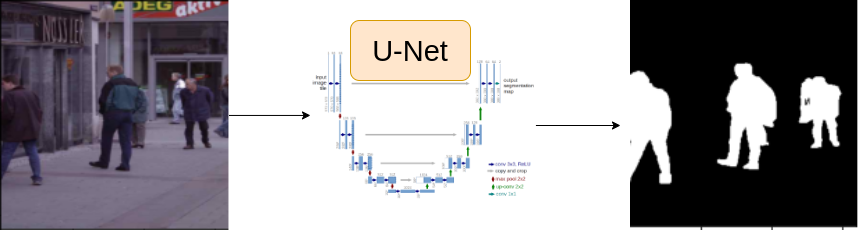

# **Some Common Imports**

In [5]:
import sys
sys.path.append('/kaggle/input/Human-Segmentation-Dataset-master')

In [6]:
import torch
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm

import helper

# Task 2: Setup Configurations

In [7]:
CSV_FILE = '/kaggle/input/content/Human-Segmentation-Dataset-master/train.csv'
DATA_DIR = '/kaggle/input/content'

DEVICE = 'cuda'

EPOCHS = 25
LR = 0.003
IMG_SIZE = 320
BATCH_SIZE = 16

ENCODER = 'timm-efficientnet-b0'
WEIGHTS = 'imagenet'

In [8]:
df = pd.read_csv(CSV_FILE)
df.head()

,masks,images
0,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
1,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
2,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
3,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
4,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...


In [9]:
row = df.iloc[3]
# # Extract image and mask paths
image_path = row.images
mask_path = row.masks

image = cv2.imread('/kaggle/input/content/'+ image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = cv2.imread('/kaggle/input/content/'+ mask_path, cv2.IMREAD_GRAYSCALE)

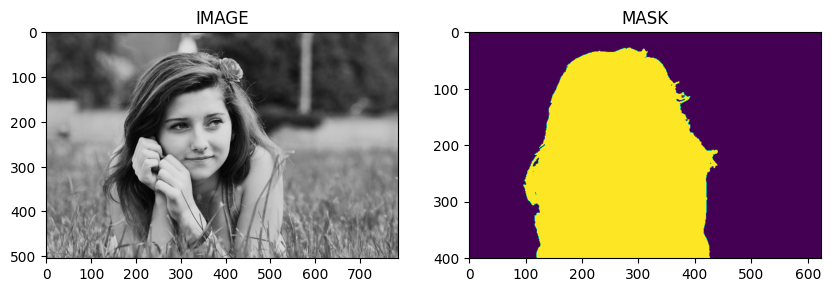

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

ax1.set_title('IMAGE')
ax1.imshow(image)

ax2.set_title('MASK')
ax2.imshow(mask)

In [11]:
train_df, valid_df = train_test_split(df, test_size = 0.2, random_state= 42)


# Task 3 : Augmentation Functions

albumentation documentation : https://albumentations.ai/docs/

In [12]:
import albumentations as A

In [13]:
def get_train_augs():
    return A.Compose([
        A.Resize(IMG_SIZE, IMG_SIZE),   
        A.HorizontalFlip(p=0.5),        
        A.VerticalFlip(p=0.5),          
    ], is_check_shapes=False)           # Disable shape check in Compose

def get_valid_augs():
    return A.Compose([
        A.Resize(IMG_SIZE, IMG_SIZE),   
    ], is_check_shapes=False)           # Disable shape check in Compose

# Task 4 : Create Custom Dataset

In [14]:
from torch.utils.data import Dataset

In [15]:
class SegmentationDataset(Dataset):
    
    def __init__(self, df, augmentations):
        self.df = df
        self.augmentations = augmentations
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_path = row.images
        mask_path = row.masks

        image = cv2.imread('/kaggle/input/content/'+ image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        mask = cv2.imread('/kaggle/input/content/'+ mask_path, cv2.IMREAD_GRAYSCALE) #(h, w, c)
        mask = np.expand_dims(mask, axis = -1)

        if self.augmentations:
            data = self.augmentations(image = image, mask = mask)
            image = data['image']
            mask = data['mask']

      #(h,w,c) -> (c, h ,w)

        image = np.transpose(image, (2,0,1)).astype(np.float32)
        mask = np.transpose(mask, (2,0,1)).astype(np.float32)

        image = torch.Tensor(image) / 255.0
        mask = torch.round(torch.Tensor(mask) / 255.0)

        return image, mask

In [16]:
trainset = SegmentationDataset(train_df, get_train_augs())
validset = SegmentationDataset(valid_df, get_valid_augs())

In [17]:
print(f"Size of Trainset : {len(trainset)}")
print(f"Size of Validset : {len(validset)}")

Size of Trainset : 232
Size of Validset : 58


In [18]:
def show_image(image,mask,pred_image = None):
    
#     image = image.cpu()
#     mask = mask.cpu()
    
    if pred_image == None:
        
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        
        ax1.set_title('IMAGE')
        ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')
        
        ax2.set_title('GROUND TRUTH')
        ax2.imshow(mask.permute(1,2,0).squeeze(),cmap = 'gray')
        
    elif pred_image != None :
#         pred_image = pred_image.cpu()
        
        f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10,5))
        
        ax1.set_title('IMAGE')
        ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')
        
        ax2.set_title('GROUND TRUTH')
        ax2.imshow(mask.permute(1,2,0).squeeze(),cmap = 'gray')
        
        ax3.set_title('MODEL OUTPUT')
        ax3.imshow(pred_image.permute(1,2,0).squeeze(),cmap = 'gray')
        

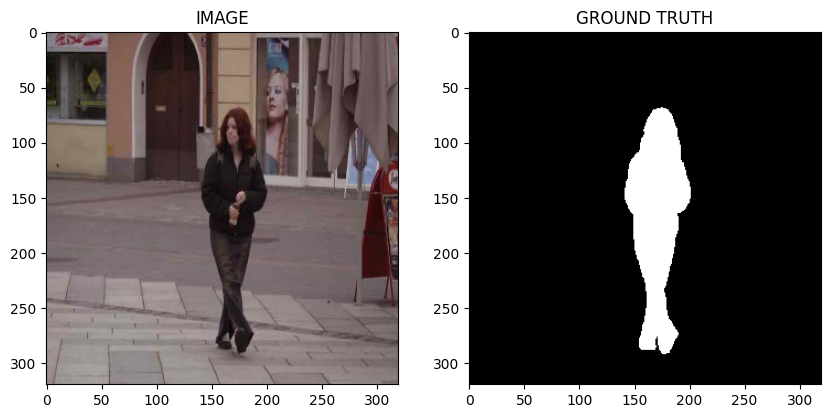

In [19]:
idx = 15

image, mask = trainset[idx]
show_image(image, mask)

# Task 5 : Load dataset into batches

In [20]:
from torch.utils.data import DataLoader

In [21]:
trainloader = DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True)
validloader = DataLoader(validset, batch_size = BATCH_SIZE)

In [22]:
print(f"Total number of batches in trainloader : {len(trainloader)}")
print(f"Total number of batches in validloader : {len(validloader)}")

Total number of batches in trainloader : 15
Total number of batches in validloader : 4


In [23]:
for images, masks in trainloader:
    print(f"one batch image shape : {images.shape}")
    print(f"one batch mask shape : {masks.shape}")
    break

one batch image shape : torch.Size([16, 3, 320, 320])
one batch mask shape : torch.Size([16, 1, 320, 320])


# Task 6 : Create Segmentation Model

segmentation_models_pytorch documentation : https://smp.readthedocs.io/en/latest/

In [24]:
from torch import nn
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.losses import DiceLoss

In [25]:
class SegmentationModel(nn.Module):
    
    def __init__(self):
        super(SegmentationModel, self).__init__()
        
        self.arc = smp.Unet(
            encoder_name = ENCODER,
            encoder_weights = WEIGHTS,
            in_channels = 3,
            classes = 1,
            activation = None
        )
        
    def forward(self, images, masks= None):
        
        logits = self.arc(images)

        if masks != None:
            loss1 = DiceLoss(mode = 'binary')(logits, masks)
            loss2 = nn.BCEWithLogitsLoss()(logits, masks)
            return logits, loss1 + loss2
        
        return logits

In [26]:
model = SegmentationModel()
model.to(DEVICE);

Downloading: "https://github.com/huggingface/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b0-0af12548.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_b0-0af12548.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 142MB/s] 


# Task 7 : Create Train and Validation Function

In [27]:
def eval_fn(model, data_loader):
    
    model.eval()
    total_loss = 0.0
    
    
    with torch.no_grad():
        for images, masks in tqdm(data_loader):
            
            images = images.to(DEVICE)
            masks = masks.to(DEVICE)
            
            logits, loss = model(images, masks)
            
            total_loss += loss.item()

    return total_loss / len(data_loader)

In [28]:
def train_fn(model, data_loader, optimizer):
    
    model.train()
    total_loss = 0.0

    for images, masks in tqdm(data_loader):
        
        images = images.to(DEVICE)
        masks = masks.to(DEVICE)
        
        optimizer.zero_grad()
        logits, loss = model(images, masks)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(data_loader)

# Task 8 : Train Model

In [29]:
optimizer = torch.optim.Adam(model.parameters(), lr = LR)

In [30]:
best_valid_loss = np.Inf

for epoch in range(EPOCHS):
    
    train_loss = train_fn(model, trainloader, optimizer)
    valid_loss = eval_fn(model, validloader)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best_model.pth')
        print("Saved Best Model!")

    print(f"Epoch : {epoch+1}/{EPOCHS}")
    print(f"Train Loss : {train_loss:.4f}")
    print(f"Valid Loss : {valid_loss:.4f}")

100%|██████████| 4/4 [00:01<00:00,  2.33it/s]


Saved Best Model!
Epoch : 1/25
Train Loss : 0.7797
Valid Loss : 1.0467


100%|██████████| 4/4 [00:00<00:00,  4.44it/s]


Saved Best Model!
Epoch : 2/25
Train Loss : 0.3746
Valid Loss : 0.8554


100%|██████████| 4/4 [00:00<00:00,  4.47it/s]


Saved Best Model!
Epoch : 3/25
Train Loss : 0.2917
Valid Loss : 0.2964


100%|██████████| 4/4 [00:00<00:00,  4.02it/s]


Epoch : 4/25
Train Loss : 0.2924
Valid Loss : 0.3276


100%|██████████| 4/4 [00:00<00:00,  4.31it/s]


Saved Best Model!
Epoch : 5/25
Train Loss : 0.2456
Valid Loss : 0.2196


100%|██████████| 4/4 [00:00<00:00,  4.50it/s]


Epoch : 6/25
Train Loss : 0.2051
Valid Loss : 0.2523


100%|██████████| 4/4 [00:00<00:00,  4.46it/s]


Epoch : 7/25
Train Loss : 0.2100
Valid Loss : 0.2392


100%|██████████| 4/4 [00:00<00:00,  4.07it/s]


Saved Best Model!
Epoch : 8/25
Train Loss : 0.1605
Valid Loss : 0.2165


100%|██████████| 4/4 [00:00<00:00,  4.44it/s]


Saved Best Model!
Epoch : 9/25
Train Loss : 0.1654
Valid Loss : 0.2012


100%|██████████| 4/4 [00:00<00:00,  4.40it/s]


Epoch : 10/25
Train Loss : 0.1404
Valid Loss : 0.2347


100%|██████████| 4/4 [00:00<00:00,  4.51it/s]


Saved Best Model!
Epoch : 11/25
Train Loss : 0.1328
Valid Loss : 0.1949


100%|██████████| 4/4 [00:00<00:00,  4.40it/s]


Saved Best Model!
Epoch : 12/25
Train Loss : 0.1384
Valid Loss : 0.1771


100%|██████████| 4/4 [00:00<00:00,  4.44it/s]


Epoch : 13/25
Train Loss : 0.1235
Valid Loss : 0.1969


100%|██████████| 4/4 [00:00<00:00,  4.45it/s]


Saved Best Model!
Epoch : 14/25
Train Loss : 0.1539
Valid Loss : 0.1764


100%|██████████| 4/4 [00:00<00:00,  4.45it/s]


Epoch : 15/25
Train Loss : 0.2406
Valid Loss : 0.4278


100%|██████████| 4/4 [00:00<00:00,  4.60it/s]


Epoch : 16/25
Train Loss : 0.2261
Valid Loss : 0.4512


100%|██████████| 4/4 [00:00<00:00,  4.47it/s]


Epoch : 17/25
Train Loss : 0.1740
Valid Loss : 0.2309


100%|██████████| 4/4 [00:00<00:00,  4.29it/s]


Saved Best Model!
Epoch : 18/25
Train Loss : 0.1425
Valid Loss : 0.1754


100%|██████████| 4/4 [00:00<00:00,  4.36it/s]


Saved Best Model!
Epoch : 19/25
Train Loss : 0.1258
Valid Loss : 0.1567


100%|██████████| 4/4 [00:00<00:00,  4.48it/s]


Epoch : 20/25
Train Loss : 0.1294
Valid Loss : 0.2050


100%|██████████| 4/4 [00:00<00:00,  4.55it/s]


Epoch : 21/25
Train Loss : 0.1646
Valid Loss : 0.2687


100%|██████████| 4/4 [00:00<00:00,  4.31it/s]


Epoch : 22/25
Train Loss : 0.1496
Valid Loss : 0.2695


100%|██████████| 4/4 [00:00<00:00,  4.38it/s]


Epoch : 23/25
Train Loss : 0.1508
Valid Loss : 0.2220


100%|██████████| 4/4 [00:00<00:00,  4.36it/s]


Epoch : 24/25
Train Loss : 0.1317
Valid Loss : 0.1768


100%|██████████| 4/4 [00:00<00:00,  4.44it/s]

Epoch : 25/25
Train Loss : 0.1283
Valid Loss : 0.2345


# Task 9 : Inference

In [31]:
idx = 28

model.load_state_dict(torch.load('/kaggle/working/best_model.pth'))
image, mask = validset[idx]


logits_mask = model(image.to(DEVICE).unsqueeze(0))
pred_mask = torch.sigmoid(logits_mask)
pred_mask = (pred_mask > 0.5) * 1.0

/tmp/ipykernel_23/3774682480.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/kaggle/working/best_model.pth'))


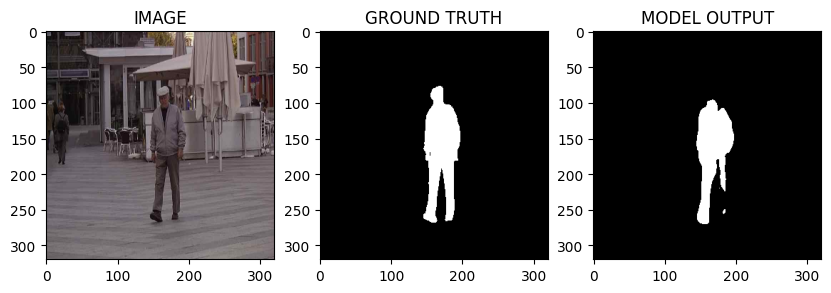

In [32]:
show_image(image, mask, pred_mask.detach().cpu().squeeze(0))

# For further updates follow me on...

Linkedin : https://www.linkedin.com/in/ankitbartwal/